In [2]:
import os

In [3]:
import sqlite3
import pandas as pd

In [4]:
#We have a csv inpatientCharges.csv
#We're reading that csv into our python project and into a pandas dataframe
InpatientData_db = pd.read_csv('inpatientCharges.csv')

Creating a sql database that can be queried from in the next step

In [5]:
#taking that pandas dataframe and putting it in a new table named inpatientCharges
#in a new database named InpatientData which is a db filetype
#and if it exists, we will replace it
InpatientData_db.to_sql("inpatientCharges", sqlite3.connect("InpatientData.db"), if_exists = "replace");

C:\Users\Tiffany\Anaconda3\lib\site-packages\pandas\core\generic.py:2130: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


Querying back the total discharges, average coverage charges, average total payments, and average medicare payments by provider state

In [6]:
#creating a connection, so python can find the database
con = sqlite3.connect('InpatientData.db')

In [7]:
#reading from the database using a sql query
#we're storing the results of the sql query to a dataframe
df = pd.read_sql_query("SELECT * FROM inpatientTable;",con)

In [8]:
df.head(3)

,index,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79


In [7]:
#### Inpatient Charges

In [10]:
#creating table of Total Discharges by State in descending order (highest to lowest)
con = sqlite3.connect('InpatientData.db')
dischargesByState = pd.read_sql_query('''select  
 `Provider State` 
,SUM(` Total Discharges `) as Total_Discharges
from inpatientTable
GROUP BY `Provider State` 
ORDER BY SUM(` Total Discharges `) DESC;''',con)
dischargesByState.head()

,Provider State,Total_Discharges
0,FL,536859
1,TX,479939
2,CA,474979
3,NY,435557
4,IL,361603


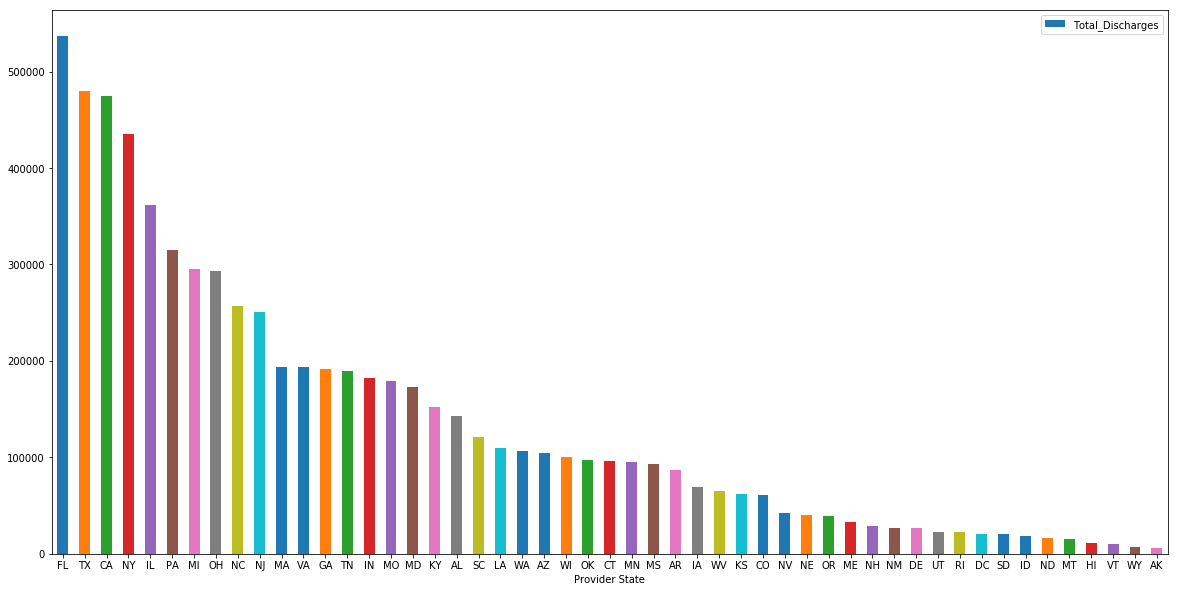

In [41]:
TotalDischargesByStatePlot = dischargesByState.plot.bar(x='Provider State', y='Total_Discharges', rot=0, figsize=(20,10))

In [15]:
#creating table of Average Coverage Charges by State in descending order (highest to lowest)
con = sqlite3.connect('InpatientData.db')
averageCoverageChargesByState = pd.read_sql_query('''select  
 `Provider State` 
,SUM(cast(replace(` Average Covered Charges `,'$','') as float)) as Average_Coverage_Charges
from inpatientTable
GROUP BY `Provider State`
ORDER BY Average_Coverage_Charges DESC;''',con)
averageCoverageChargesByState.head()

,Provider State,Average_Coverage_Charges
0,CA,8.819326e+08
1,FL,5.133111e+08
2,TX,4.921210e+08
3,NJ,3.191226e+08
4,PA,3.093034e+08


In [32]:
#averageCoverageChargesByState.describe()

In [33]:
averageCoverageChargesByState["Average_Coverage_Charges"].astype(int).head()

0    881932566
1    513311085
2    492121014
3    319122561
4    309303421
Name: Average_Coverage_Charges, dtype: int32

In [36]:
averageCoverageChargesByState['AvgCoverageCharges'] = averageCoverageChargesByState["Average_Coverage_Charges"].astype(int)

In [37]:
averageCoverageChargesByState.head()

,Provider State,Average_Coverage_Charges,AvgCoverageCharges
0,CA,8.819326e+08,881932566
1,FL,5.133111e+08,513311085
2,TX,4.921210e+08,492121014
3,NJ,3.191226e+08,319122561
4,PA,3.093034e+08,309303421


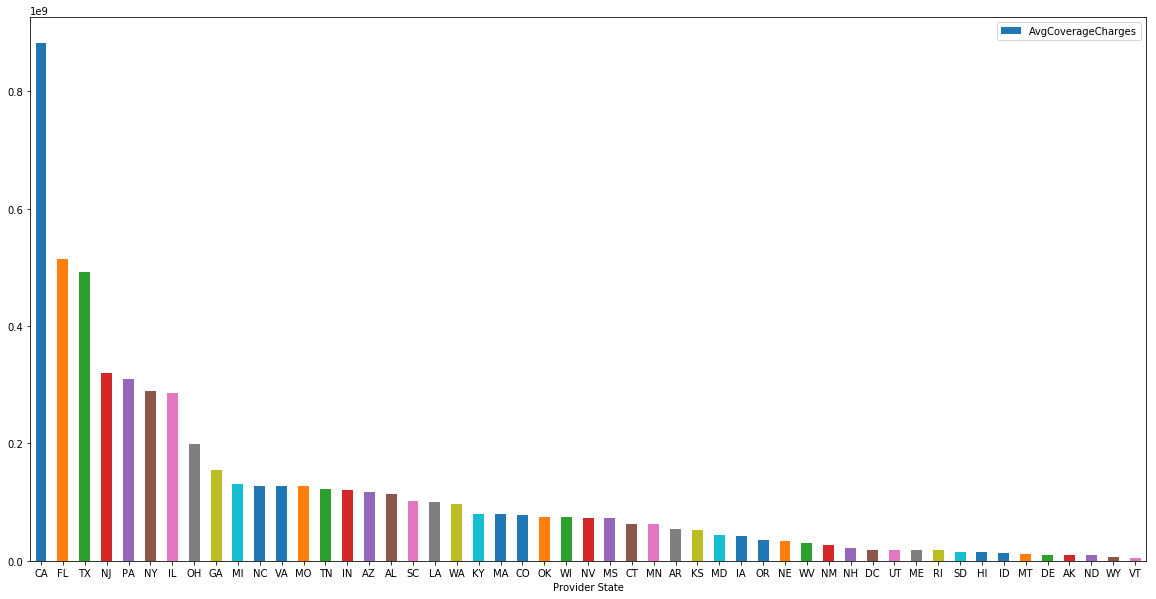

In [40]:
AverageCoverageChargesByStatePlot = averageCoverageChargesByState.plot.bar(x='Provider State', y='AvgCoverageCharges', rot=0, figsize=(20,10))


In [30]:
#creating table of Average Total Payments by State in descending order (highest to lowest)
con = sqlite3.connect('InpatientData.db')
averageTotalPaymentsByState = pd.read_sql_query('''select  
 `Provider State` 
,SUM(` Average Total Payments `) as Average_Total_Payments
from inpatientTable
GROUP BY `Provider State`
ORDER BY `Average_Total_Payments` DESC;''',con)
averageTotalPaymentsByState

,Provider State,Average_Total_Payments
0,AK,0.0
1,AL,0.0
2,AR,0.0
3,AZ,0.0
4,CA,0.0
5,CO,0.0
6,CT,0.0
7,DC,0.0
8,DE,0.0
9,FL,0.0


In [31]:
#creating table of Average Medicare Payments by State in descending order (highest to lowest)
con = sqlite3.connect('InpatientData.db')
averageMedicarePaymentsByState = pd.read_sql_query('''select  
 `Provider State` 
,SUM("Average Medicare Payments") as Average_Medicare_Payments
from inpatientTable
GROUP BY `Provider State`
ORDER BY `Average_Medicare_Payments` DESC;''',con)
averageMedicarePaymentsByState

,Provider State,Average_Medicare_Payments
0,AK,0.0
1,AL,0.0
2,AR,0.0
3,AZ,0.0
4,CA,0.0
5,CO,0.0
6,CT,0.0
7,DC,0.0
8,DE,0.0
9,FL,0.0


In [ ]:
#creating table of DRG's
con = sqlite3.connect('InpatientData.db')
averageMedicarePaymentsByState = pd.read_sql_query('''select  
 `Provider State` 
,SUM("Average Medicare Payments") as Average_Medicare_Payments
from inpatientTable
GROUP BY `Provider State`
ORDER BY `Average_Medicare_Payments` DESC;''',con)
averageMedicarePaymentsByState

In [32]:
#creating table of Total Discharges by DRG's
con = sqlite3.connect('InpatientData.db')
dischargesByDRG = pd.read_sql_query('''select  
 `DRG Definition` 
,SUM(` Total Discharges `) as Total_Discharges
from inpatientTable
GROUP BY `DRG Definition` 
ORDER BY SUM(` Total Discharges `) ;''',con)
dischargesByDRG

,DRG Definition,Total_Discharges
0,419 - LAPAROSCOPIC CHOLECYSTECTOMY W/O C.D.E. ...,16157
1,203 - BRONCHITIS & ASTHMA W/O CC/MCC,16577
2,301 - PERIPHERAL VASCULAR DISORDERS W/O CC/MCC,16744
3,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,16952
4,315 - OTHER CIRCULATORY SYSTEM DIAGNOSES W CC,17478
5,602 - CELLULITIS W MCC,17714
6,480 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOIN...,17851
7,439 - DISORDERS OF PANCREAS EXCEPT MALIGNANCY ...,17948
8,418 - LAPAROSCOPIC CHOLECYSTECTOMY W/O C.D.E. ...,18227
9,469 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,18714


In [33]:
#creating table of Average Total Payments by DRG in descending order (highest to lowest)
con = sqlite3.connect('InpatientData.db')
averageTotalPaymentsByDRG = pd.read_sql_query('''select  
 `DRG Definition` 
,SUM("Average Total Payments") as Average_Total_Payments
from inpatientTable
GROUP BY `DRG Definition`
ORDER BY `Average_Total_Payments` DESC;''',con)
averageTotalPaymentsByDRG

,DRG Definition,Average_Total_Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.0
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,0.0
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,0.0
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,0.0
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,0.0
5,069 - TRANSIENT ISCHEMIA,0.0
6,074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O...,0.0
7,101 - SEIZURES W/O MCC,0.0
8,149 - DYSEQUILIBRIUM,0.0
9,176 - PULMONARY EMBOLISM W/O MCC,0.0


In [ ]:
make_graph("Total Discharges")

In [ ]:
make_graph("Average Covered Charges")

In [ ]:
make_graph("Average Total Payments")

In [ ]:
make_graph("Average Medicare Payments")